In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

You can read about dataset from [here](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)

In [2]:
df = pd.read_csv(r'C:\Users\Siam Cheema\Downloads\bank\bank-full.csv', sep=';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.shape

(45211, 17)

In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [7]:
y = df['y'].values

In [8]:
df = df.iloc[:,:-1]

In [9]:
df_categorical = df.select_dtypes('object')
df_int_float = df.select_dtypes('int64')

In [10]:
df_categorical.shape, df_int_float.shape

((45211, 9), (45211, 7))

In [11]:
df_one_hot_encoded = pd.get_dummies(df_categorical)

In [12]:
df_one_hot_encoded.shape

(45211, 44)

In [13]:
df_one_hot_encoded = df_one_hot_encoded.iloc[:,1:] #avoiding the dummy variable trap

In [14]:
df_final = pd.concat([df_one_hot_encoded,df_int_float],axis=1)

In [15]:
df_final.shape

(45211, 50)

In [16]:
df_final.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,duration,campaign,pdays,previous
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,58,2143,5,261,1,-1,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,1,44,29,5,151,1,-1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,1,33,2,5,76,1,-1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,47,1506,5,92,1,-1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,33,1,5,198,1,-1,0


In [17]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
y = lab.fit_transform(y)

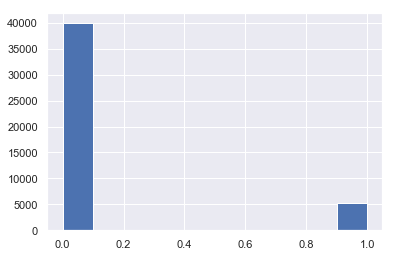

In [18]:
plt.hist(y);

In [19]:
X = df_final.values
X = X.astype('float64')

In [20]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=42)

In [22]:
X_train.shape, X_test.shape

((33908, 50), (11303, 50))

In [23]:
sc = StandardScaler()

In [24]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
svm = SVC(gamma='scale')
lr = LogisticRegression(solver='lbfgs', max_iter=150)
knn = KNeighborsClassifier()

In [26]:
svm.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [27]:
def print_score(model, X_train, y_train, X_test, y_test, train=True):
    '''
    Taining Performence
    '''
    if train:
        print("Train Result:\n")
        print("Accuracy Score: {0:.4f}\n".format(accuracy_score(y_train, model.predict(X_train))))
        print("Classification Report: \n {} \n".format(classification_report(y_train,model.predict(X_train))))
        print("Confusion Matrix:")
        print(confusion_matrix(y_train, model.predict(X_train)))
        
        res = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
    
    elif train == False:
        '''
        Testing Performence
        '''
        print("Test Results:\n")
        print("Accuracy Score: {0:.4f}".format(accuracy_score(y_test, model.predict(X_test))))
        print("Classification Report: \n {} \n".format(classification_report(y_test,model.predict(X_test))))
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, model.predict(X_test)))

In [28]:
print_score(svm, X_train, y_train, X_test, y_test, train=True)

Train Result:

Accuracy Score: 0.9193

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.98      0.96     29972
           1       0.78      0.42      0.55      3936

   micro avg       0.92      0.92      0.92     33908
   macro avg       0.86      0.70      0.75     33908
weighted avg       0.91      0.92      0.91     33908
 

Confusion Matrix:
[[29514   458]
 [ 2280  1656]]
Average Accuracy: 	 0.9022
Accuracy SD: 		 0.0017


In [29]:
print_score(svm, X_train, y_train, X_test, y_test, train=False)

Test Results:

Accuracy Score: 0.9040
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      9950
           1       0.69      0.36      0.47      1353

   micro avg       0.90      0.90      0.90     11303
   macro avg       0.80      0.67      0.71     11303
weighted avg       0.89      0.90      0.89     11303
 

Confusion Matrix:
[[9733  217]
 [ 868  485]]


In [30]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=150, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [31]:
print_score(lr, X_train, y_train, X_test, y_test, train=True)

Train Result:

Accuracy Score: 0.9029

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     29972
           1       0.65      0.35      0.45      3936

   micro avg       0.90      0.90      0.90     33908
   macro avg       0.79      0.66      0.70     33908
weighted avg       0.89      0.90      0.89     33908
 

Confusion Matrix:
[[29253   719]
 [ 2573  1363]]
Average Accuracy: 	 0.9023
Accuracy SD: 		 0.0026


In [32]:
print_score(lr, X_train, y_train, X_test, y_test, train=False)

Test Results:

Accuracy Score: 0.8989
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      9950
           1       0.64      0.35      0.45      1353

   micro avg       0.90      0.90      0.90     11303
   macro avg       0.78      0.66      0.70     11303
weighted avg       0.88      0.90      0.89     11303
 

Confusion Matrix:
[[9692  258]
 [ 885  468]]


In [33]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [34]:
print_score(knn, X_train, y_train, X_test, y_test, train=True)

Train Result:

Accuracy Score: 0.9164

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95     29972
           1       0.74      0.43      0.54      3936

   micro avg       0.92      0.92      0.92     33908
   macro avg       0.84      0.70      0.75     33908
weighted avg       0.91      0.92      0.91     33908
 

Confusion Matrix:
[[29386   586]
 [ 2248  1688]]
Average Accuracy: 	 0.8911
Accuracy SD: 		 0.0021


In [35]:
print_score(knn, X_train, y_train, X_test, y_test, train=False)

Test Results:

Accuracy Score: 0.8944
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      9950
           1       0.61      0.33      0.43      1353

   micro avg       0.89      0.89      0.89     11303
   macro avg       0.76      0.65      0.68     11303
weighted avg       0.88      0.89      0.88     11303
 

Confusion Matrix:
[[9664  286]
 [ 908  445]]
